In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Understanding
We first extract accidents happening before 2020 and then we understand how many different values for each column is there as well as how many different accident categories are there

In [69]:
accidents_dataset = pd.read_csv('./GermanCarAccidentsStats.csv')
#print(accidents_dataset.columns)

features = ['MONATSZAHL','AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']

accidents_dataset = accidents_dataset[features]

accidents_before_2020 = accidents_dataset[ accidents_dataset['JAHR'] < 2020]


# How many different values in every column
print(accidents_before_2020.nunique())

#What are the different categories of accidents are there
print(accidents_before_2020['MONATSZAHL'].value_counts())

MONATSZAHL       3
AUSPRAEGUNG      3
JAHR            20
MONAT          241
WERT           909
dtype: int64
Verkehrsunfälle    780
Fluchtunfälle      520
Alkoholunfälle     520
Name: MONATSZAHL, dtype: int64


# Visualizing Accidents per Category
Here we visualize the accidents count per year for every of the three accidents categories

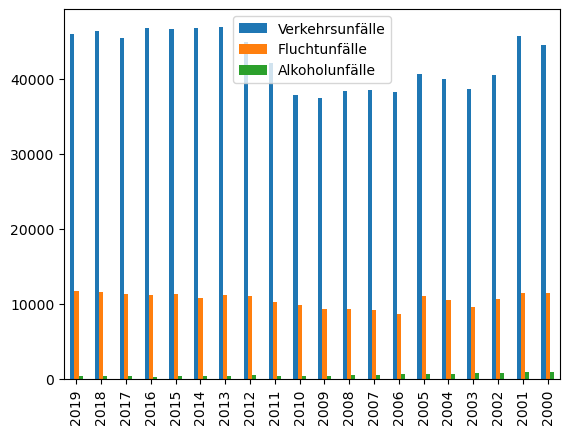

In [68]:

#print(accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Verkehrsunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ] )
#print(accidents_before_2020[   ((accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ] )

vehicle_accidents = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Verkehrsunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]
hit_and_run_accidents = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Fluchtunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]
alcohol_accidents = accidents_before_2020[   ( ( accidents_before_2020['MONATSZAHL'] == 'Alkoholunfälle' ) &   (accidents_before_2020['MONAT'] == 'Summe')  &  (accidents_before_2020['AUSPRAEGUNG'] == 'insgesamt')    )  ]

years = [   i for i in range(2000, 2020 )   ]
years.sort(reverse=True)

accidents_per_year = pd.DataFrame(
    {
        "Verkehrsunfälle": vehicle_accidents['WERT'].to_numpy(),
        "Fluchtunfälle": hit_and_run_accidents['WERT'].to_numpy(),
        "Alkoholunfälle": alcohol_accidents['WERT'].to_numpy()
    },
    index= years
)

accidents_per_year.plot(kind='bar')
plt.show()